In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
gc.enable()

In [2]:
problem_name = "wirelessDelay"
planning_horizon = 3
gametype = "stackelberg"
sota = False
num_iterations = 3

PROBLEM.initialize(DecPOMDP(problem_name,horizon=planning_horizon))
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
problem = PROBLEM.get_instance()
print(f"State size = {len(problem.STATES)}")
print(problem.JOINT_ACTIONS)
print(problem.JOINT_OBSERVATIONS)
for type,matrix in problem.REWARDS.items():
    print(type)
    print(f"leader :\n{matrix[0]}\nfollower : \n{matrix[1]}")


State size = 64
[0, 1, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
cooperative
leader :
[[ 0. -1. -2. -3. -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1.
  -2. -3. -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1. -2. -3.
  -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1. -2. -3. -1. -2.
  -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.]
 [ 0. -1. -2. -3. -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1.
  -2. -3. -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1. -2. -3.
  -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1. -2. -3. -1. -2.
  -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.]
 [ 0. -1. -2. -3. -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1.
  -2. -3. -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1. -2. -3.
  -1. -2. -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.  0. -1. -2. -3. -1. -2.
  -3. -4. -2. -3. -4. -5. -3. -4. -5. -6.]
 [ 0. -1. -2. -3. -1

In [4]:
# check belief objects and expansion

bs = BeliefSpace(planning_horizon,density=0.001)
bs.expansion()
bs.print_network()
bs.print_belief_table()

	belief expansion done, belief space size = 43

  ∟ belief 0 : [0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
      ∟ action 0, observation 0 : belief 1
      ∟ action 0, observation 1 : belief 1
      ∟ action 0, observation 2 : belief 1
      ∟ action 0, observation 6 : belief 1
      ∟ action 0, observation 7 : belief 1
      ∟ action 0, observation 8 : belief 1
      ∟ action 0, observation 12 : belief 1
      ∟ action 0, observation 13 : belief 1
      ∟ action 0, observation 14 : belief 1
      ∟ action 1, observation 0 : belief 1
      ∟ action 1, observation 1 : belief 1
      ∟ action 1, observation 2 : belief 1
      ∟ action 1, observation 6 : belief 1
      ∟ action 1, observation 7 : belief 1
      ∟ action

In [5]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations,algorithm="maxplane")
experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


			 Solving stackelberg wirelessDelay GAME Horizon 3 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 65


========== Backup at timestep 2 ==========
		belief: 2 = [9.6059601e-01 1.9602000e-04 0.0000000e+00 0.0000000e+00 1.9602000e-04
 4.0000000e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.7029900e-03 9.6049800e-03 0.0000000e+00 0.0000000e+00
 1.9800000e-06 1.9600000e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.7029900e-03 1.9800000e-06 0.0000000e+00
 0.0000000e+00 9.6049800e-03 1.9600000e-06 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.8010000e-05 9.7020000e-05
 0.0000000e+00 0.0000000e+00 9.7020000e-05 9.6040000e-05 0.0000000e+00
 0.0000000e+00 0.0000000e+

In [ ]:
experiment.run_experiment_decreasing_density(0.3)

			 Solving cooperative relay4 GAME Horizon 1 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 10


========== Backup at timestep 0 ==========
		belief: 0 = [0. 0. 0. 1.] , 	leader value: -1.0, 	follower value (by state):  [-1. -1. -1. -1.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  -1.0 , follower = [-1. -1. -1. -1.]

iteration : 2
	belief expansion done, belief space size = 12


========== Backup at timestep 0 ==========
		belief: 0 = [0. 0. 0. 1.] , 	leader value: -1.0, 	follower value (by state):  [-1. -1. -1. -1.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  -1.0 , follower = [-1. -1. -1. -1.]

iteration : 

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,leader values,follower values,density
0,cooperative,Stackelberg,1,3,"[0.06990218162536621, 0.037188053131103516, 0....","[10, 12, 18]","[-1.0, -1.0, -1.0]","[[-1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, ...","[0.3, 0.150005, 1e-05]"
1,cooperative,Stackelberg,2,3,"[0.1258230209350586, 0.13175225257873535, 0.18...","[12, 18, 61]","[-2.0, -2.0, -2.0]","[[-2.0, -2.0, -2.0, -2.0], [-2.0, -2.0, -2.0, ...","[0.3, 0.150005, 1e-05]"
2,cooperative,Stackelberg,3,3,"[0.3829162120819092, 0.44094276428222656, 1.19...","[13, 31, 310]","[-3.0, -3.0, -3.0]","[[38.309999999999995, -3.0, -3.0, -3.0], [38.3...","[0.3, 0.150005, 1e-05]"
3,cooperative,State of the Art,1,3,"[0.00860905647277832, 0.0074541568756103516, 0...","[10, 12, 18]","[-1.0, -1.0, -1.0]","[[-1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, ...","[0.3, 0.150005, 1e-05]"
4,cooperative,State of the Art,2,3,"[0.0242769718170166, 0.03341197967529297, 0.06...","[12, 18, 61]","[-2.0, -2.0, -2.0]","[[-2.0, -2.0, -2.0, -2.0], [-2.0, -2.0, -2.0, ...","[0.3, 0.150005, 1e-05]"
5,cooperative,State of the Art,3,3,"[0.05533313751220703, 0.0866239070892334, 0.63...","[13, 31, 310]","[-3.0, -3.0, -3.0]","[[38.309999999999995, -3.0, -3.0, -3.0], [38.3...","[0.3, 0.150005, 1e-05]"
6,zerosum,Stackelberg,1,3,"[0.028162002563476562, 0.027865171432495117, 0...","[10, 12, 18]","[-50.0, -50.0, -50.0]","[[50.0, 50.0, 50.0, 50.0], [50.0, 50.0, 50.0, ...","[0.3, 0.150005, 1e-05]"
7,zerosum,Stackelberg,2,3,"[0.1273658275604248, 0.13504409790039062, 0.18...","[12, 18, 61]","[-100.0, -100.0, -100.0]","[[100.0, 100.0, 100.0, 100.0], [100.0, 100.0, ...","[0.3, 0.150005, 1e-05]"
8,zerosum,Stackelberg,3,3,"[0.36768102645874023, 0.4330270290374756, 1.07...","[13, 31, 310]","[-150.0, -150.0, -150.0]","[[150.0, 150.0, 150.0, 150.0], [150.0, 150.0, ...","[0.3, 0.150005, 1e-05]"
9,zerosum,State of the Art,1,3,"[0.030418872833251953, 0.03047013282775879, 0....","[10, 12, 18]","[-50.0, -50.0, -50.0]","[[1.0, 1.0, 1.0, 50.0], [1.0, 1.0, 1.0, 50.0],...","[0.3, 0.150005, 1e-05]"


In [ ]:
tables = experiment.generate_summary_table()
tables["zerosum"]

State of the Art                             PBVI               \
                      time leader value iteration      time leader value   
relay4(0)         0.053275        -50.0         3  0.028383        -50.0   
relay4(1)         0.185665       -100.0         3  0.180869       -100.0   
relay4(2)         1.108114       -150.0         3  1.075145       -150.0   

                     
          iteration  
relay4(0)         3  
relay4(1)         3  
relay4(2)         3

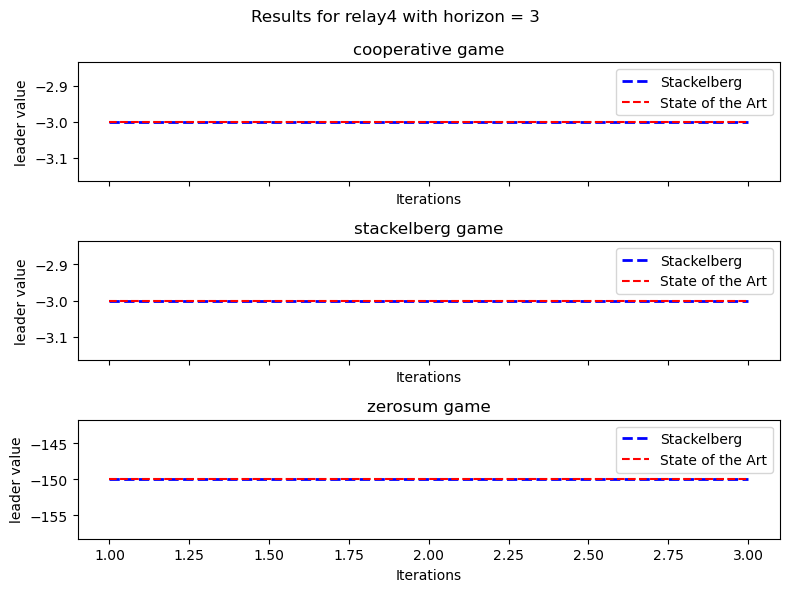

In [ ]:
experiment.plots()